In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.


In [2]:
clus_df = pd.read_excel('Clustering Clean Ads_Data-2.xlsx')

### Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values

In [3]:
clus_df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [4]:
clus_df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [5]:
clus_df.shape

(23066, 19)

In [6]:
clus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [7]:
clus_df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [8]:
clus_df.duplicated().sum()

0

From a quick look at the information, we can see there are 6 categorical or object-type data and 13 numerical data columns.
Also, we can observe that CTR, CPM, CPC are having few null values.
Let’s confirm it by using is null () and sum() functions


### Clustering: Treat missing values in CPC, CTR and CPM 

In [9]:
len=clus_df.shape[0]
for i in range(len):
    clicks = clus_df['Clicks'][i]
    impression = clus_df['Impressions'][i]
    clus_df['CPM'][i] = (clicks/impression)*1000

<ipython-input-9-181cd62e642e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_df['CPM'][i] = (clicks/impression)*1000


In [10]:
for i in range(len):
    clicks = clus_df['Clicks'][i]
    spend = clus_df['Spend'][i]
    clus_df['CPC'][i] = (spend/clicks)

<ipython-input-10-c501bfe46e70>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_df['CPC'][i] = (spend/clicks)


In [11]:
for i in range(len):
    clicks = clus_df['Clicks'][i]
    impression = clus_df['Impressions'][i]
    clus_df['CTR'][i] = (clicks/impression)*100

<ipython-input-11-2ccb06d24a0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_df['CTR'][i] = (clicks/impression)*100


In [12]:
clus_df['CPM'].isnull().sum()

0

In [13]:
clus_df['CPC'].isnull().sum()

0

In [14]:
clus_df['CTR'].isnull().sum()

0

In [15]:
clus_df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [16]:
clus_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.000000,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.000000,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.000000,72000.000000,72000.000000,8.400000e+04,2.160000e+05
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.000000,33672.250000,483771.000000,2.527712e+06,2.759286e+07
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.000000,18282.500000,258087.500000,1.180700e+06,1.470202e+07
Impressions,23066.0,1.241520e+06,2.429400e+06,1.000000,7990.500000,225290.000000,1.112428e+06,1.419477e+07
Clicks,23066.0,1.067852e+04,1.735341e+04,1.000000,710.000000,4425.000000,1.279375e+04,1.430490e+05
Spend,23066.0,2.706626e+03,4.067927e+03,0.000000,85.180000,1425.125000,3.121400e+03,2.693187e+04
Fee,23066.0,3.351231e-01,3.196322e-02,0.210000,0.330000,0.350000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.924252e+03,3.105238e+03,0.000000,55.365375,926.335000,2.091338e+03,2.127618e+04


### Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ.

In [17]:
cluster_df = clus_df.drop(['Timestamp','InventoryType','Ad Type','Platform','Device Type','Format'],axis=1)

In [18]:
cluster_df

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.309598,3.095975,0.00
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.350877,3.508772,0.00
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.281690,2.816901,0.00
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.202020,2.020202,0.00
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.413223,4.132231,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,1000.000000,0.07
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,500.000000,0.04
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,1000.000000,0.05
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,1000.000000,0.07


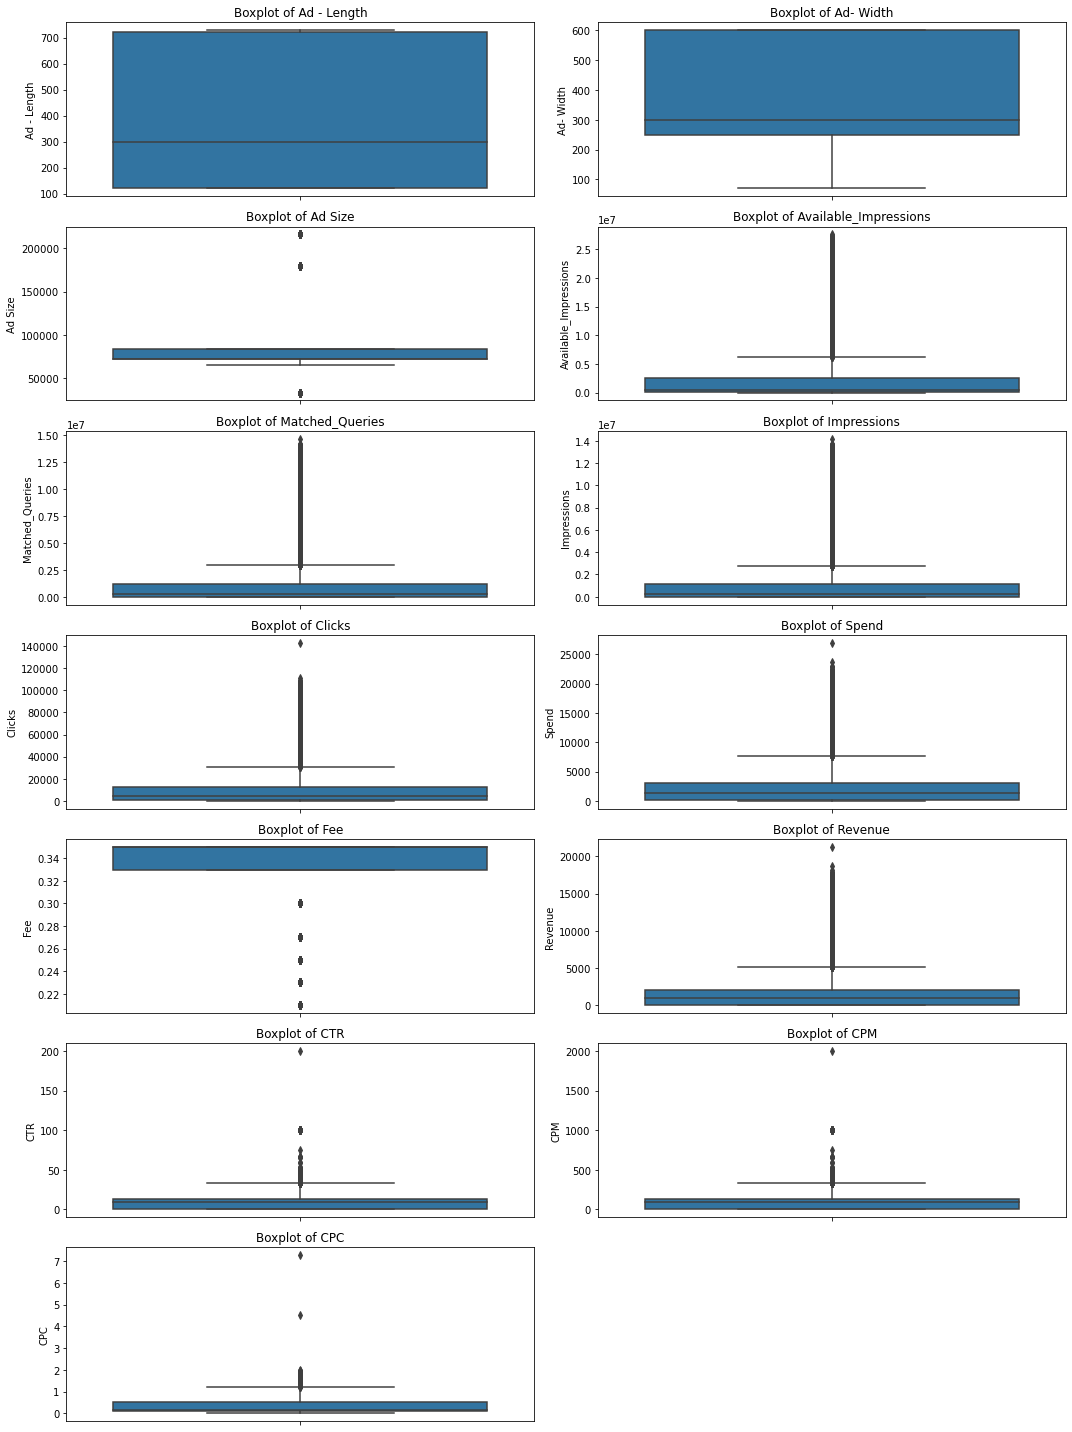

In [19]:
plt.figure(figsize=(15,20))
column_list = cluster_df.columns
lent=column_list.shape[0]
for i in range(lent):
    plt.subplot(7,2,i+1)
    sns.boxplot(y=cluster_df[column_list[i]],data=cluster_df)
    plt.title('Boxplot of {}'.format(column_list[i]))
    plt.tight_layout()

Here we could see that there are outliers. As we are dealing with K-Means.
K-Means algorithm does not give best results. It is sensitive to outliers. 
K-Means deals with the averages, which can get effected by the outleirs. Hence here we are treating the outliers.

Here the dat points which are above the upper limit is limited to that upper limit point and data points which are less than the lower limit is limited to lower limit itself.

In [20]:
def detect_outlier(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    up_lim = q3 + (1.5 * iqr)
    lr_lim = q1 - (1.5 * iqr)
    return lr_lim,up_lim

In [21]:
length = cluster_df.columns
for i in length:
    lr,ur = detect_outlier(cluster_df[i])
    cluster_df[i] = np.where(cluster_df[i]>ur,ur,cluster_df[i])
    cluster_df[i] = np.where(cluster_df[i]<lr,lr,cluster_df[i])
    

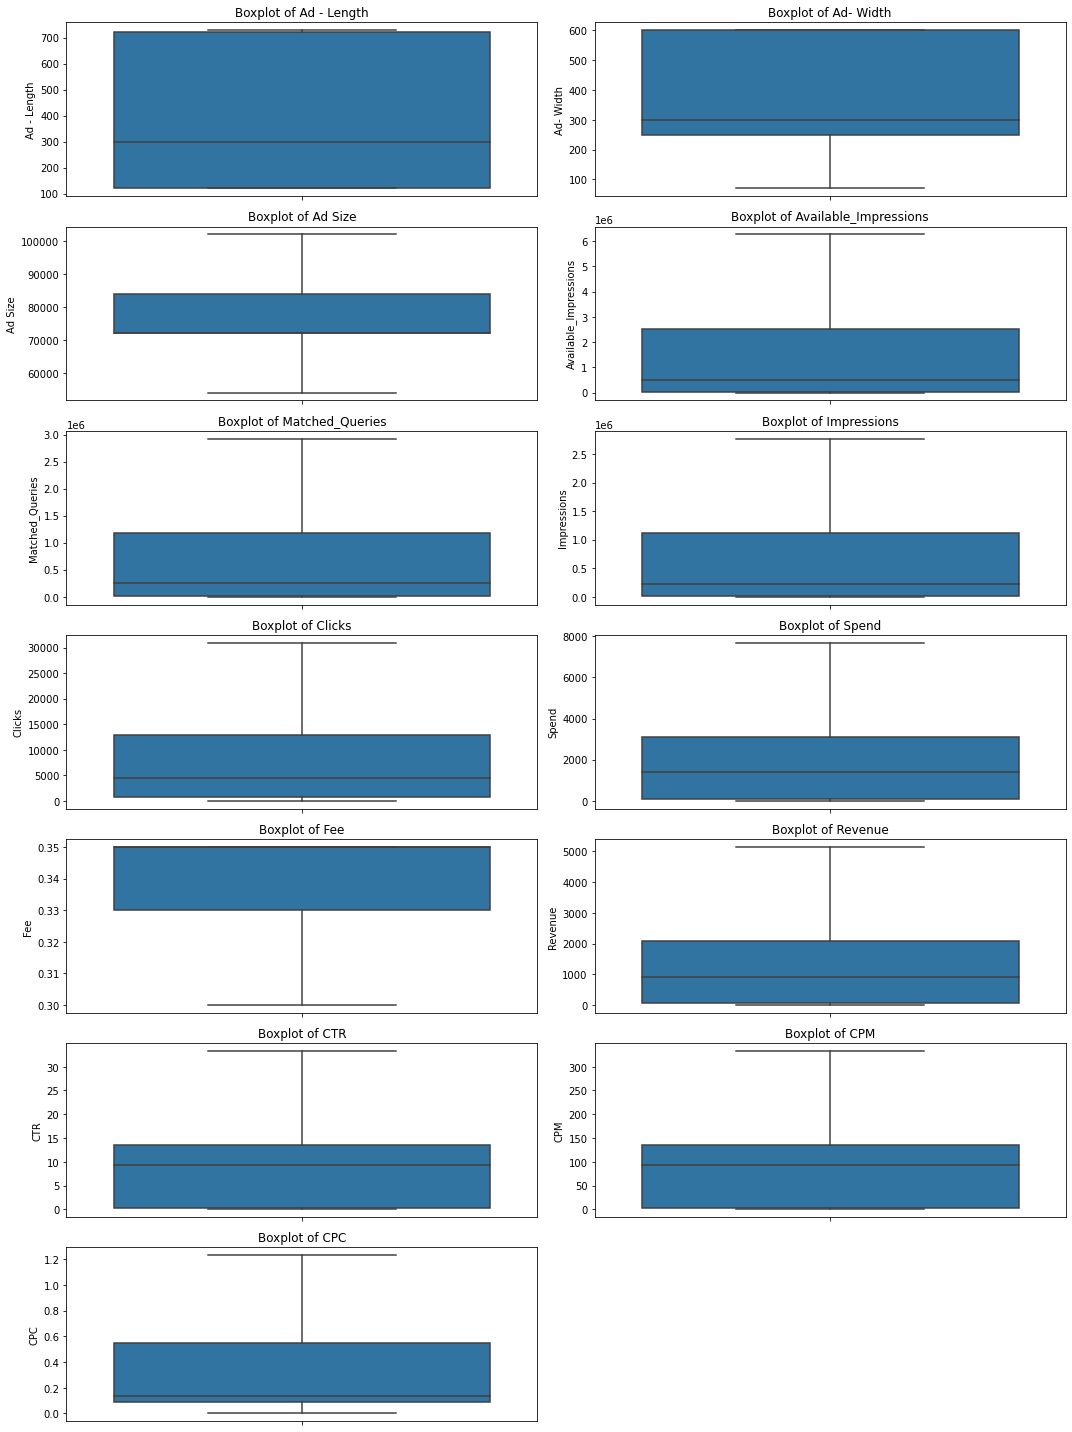

In [22]:
plt.figure(figsize=(15,20))
column_list = cluster_df.columns
lent=column_list.shape[0]
for i in range(lent):
    plt.subplot(7,2,i+1)
    sns.boxplot(y=cluster_df[column_list[i]],data=cluster_df)
    plt.title('Boxplot of {}'.format(column_list[i]))
    plt.tight_layout()

### Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [23]:
from scipy.stats import zscore

#apply the scaler to the data:
df_scaled =  cluster_df.apply(zscore)
df_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-0.958836,-0.958836,-1.042561
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-0.953835,-0.953835,-1.042561
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-0.962218,-0.962218,-1.042561
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-0.971871,-0.971871,-1.042561
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-0.946281,-0.946281,-1.042561


All such distance based algorithms are affected by the scale of the variables.

The most common way is to calculate the Euclidean distance

We do not want our algorithm to be affected by the magnitude of these variables. The algorithm should not be biased towards variables with higher magnitude. 

To overcome this problem, we can bring down all the variables to the same scale.

If we could see the data which is not scaled, the data is of different scales. The scale of Ad-length is in hundreds, Ad-size is in Thousands, and some other columns are with very less scale.

This effects the Euclidean distance.

### Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance

In [24]:
import scipy.cluster.hierarchy as hrchy

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [26]:
wardlink = linkage(df_scaled, method = 'ward')

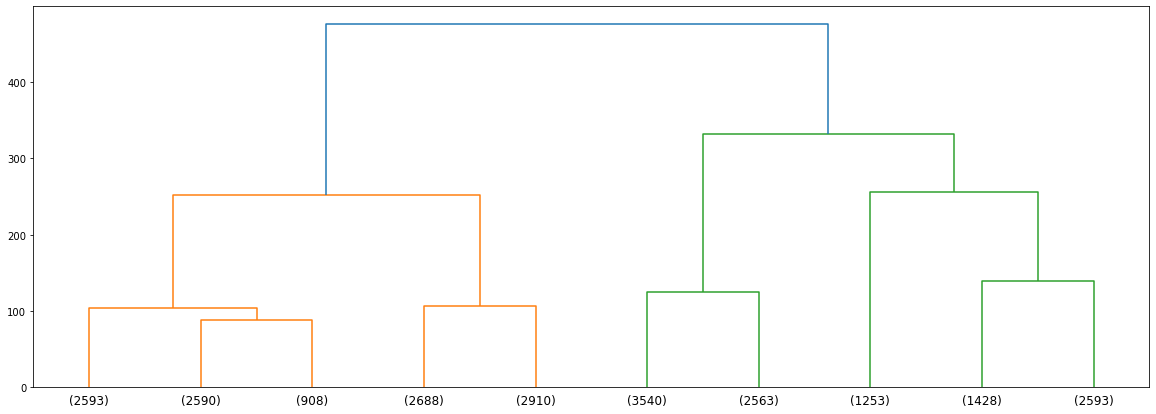

In [27]:
plt.figure(figsize=(20,7))
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

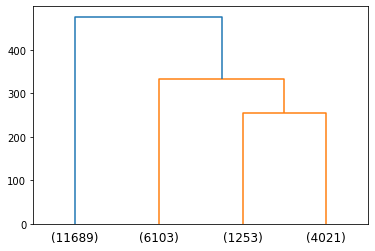

In [28]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 4,
                 )

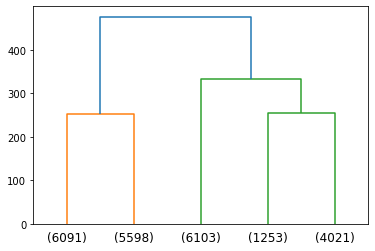

In [29]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 5,
                 )

In [30]:
clusters = fcluster(wardlink, 5, criterion='maxclust')
clusters

array([2, 2, 2, ..., 2, 1, 2], dtype=int32)

In [31]:
clus_df['Cluster'] = clusters

In [32]:
clus_df['Cluster'].unique()

array([2, 1, 3, 5, 4], dtype=int32)

In [33]:
clus_df.groupby(by='Cluster').mean()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
Cluster,,,,,,,,,,,,,
1,121.477590,600.000000,72886.553932,5.037730e+04,3.253899e+04,2.444785e+04,3474.821376,381.114323,0.349150,251.206953,16.250149,162.501485,0.101837
2,624.190782,304.680243,188379.957128,2.149697e+05,1.179942e+05,9.969003e+04,12395.361200,1081.149628,0.349518,704.440127,13.296394,132.963939,0.089684
3,432.892020,148.195969,54817.093233,1.888589e+06,9.087004e+05,8.675983e+05,3343.195805,1585.189802,0.348994,1034.013060,0.397030,3.970296,0.581016
4,141.835595,572.067039,75715.881883,8.787287e+05,6.207391e+05,5.238120e+05,71556.263368,7645.819425,0.278819,5532.487799,13.774287,137.742870,0.110390
5,455.203183,202.056702,75098.124845,1.043526e+07,5.642986e+06,5.465960e+06,11363.547376,8655.249958,0.290328,6383.600587,0.220986,2.209862,0.735938


In [34]:
clus_df['Cluster'].value_counts().sort_index()

1    6091
2    5598
3    6103
4    1253
5    4021
Name: Cluster, dtype: int64

In [35]:
df_clust = clus_df.groupby('Cluster').mean()
cluster_freq = clus_df['Cluster'].value_counts().sort_index()
df_clust['cluster count'] = cluster_freq
df_clust

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,cluster count
Cluster,,,,,,,,,,,,,,
1,121.477590,600.000000,72886.553932,5.037730e+04,3.253899e+04,2.444785e+04,3474.821376,381.114323,0.349150,251.206953,16.250149,162.501485,0.101837,6091
2,624.190782,304.680243,188379.957128,2.149697e+05,1.179942e+05,9.969003e+04,12395.361200,1081.149628,0.349518,704.440127,13.296394,132.963939,0.089684,5598
3,432.892020,148.195969,54817.093233,1.888589e+06,9.087004e+05,8.675983e+05,3343.195805,1585.189802,0.348994,1034.013060,0.397030,3.970296,0.581016,6103
4,141.835595,572.067039,75715.881883,8.787287e+05,6.207391e+05,5.238120e+05,71556.263368,7645.819425,0.278819,5532.487799,13.774287,137.742870,0.110390,1253
5,455.203183,202.056702,75098.124845,1.043526e+07,5.642986e+06,5.465960e+06,11363.547376,8655.249958,0.290328,6383.600587,0.220986,2.209862,0.735938,4021


### Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [36]:
from sklearn.cluster import KMeans

In [37]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

kmeans inertia gives the within sum of squares

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [38]:
for i in range(2,11):
    print('The WSS value for',i,'clusters is',wcss[i-2])

The WSS value for 2 clusters is 182872.34035143774
The WSS value for 3 clusters is 130544.6477883927
The WSS value for 4 clusters is 94926.7699320993
The WSS value for 5 clusters is 61434.524284973624
The WSS value for 6 clusters is 51574.2616188426
The WSS value for 7 clusters is 44491.59299366249
The WSS value for 8 clusters is 37788.858499576265
The WSS value for 9 clusters is 33505.92591117334
The WSS value for 10 clusters is 30988.20569025232


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


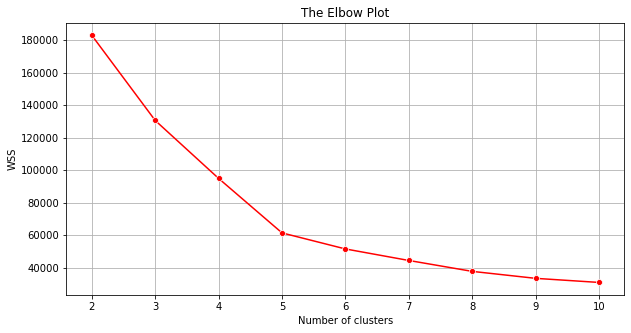

In [146]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), wcss,marker='o',color='red')
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.grid()
plt.show()

The Elbow method is used to find the optimum number of clusters while doing K-Means.

Here 5 is the optimum no. of clusters.

As the difference or variance is more upto 5 clusters.


### Print silhouette scores for up to 10 clusters and identify optimum number of clusters

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [51]:
silscores=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil_score = silhouette_score(df_scaled,labels)
    silscores.append(sil_score)

In [52]:
silscores

[0.3880914534420389,
 0.3842453039186148,
 0.4495511197534906,
 0.5296776454784944,
 0.527590725438368,
 0.5220635854819954,
 0.4968722443929237,
 0.4790423315852688,
 0.4922718574674112]

Observing the Silhouette scores,we can conclude that 5 is optimum number of clusters.

###  Profile the ads based on optimum number of clusters using silhouette score and your domain understanding 

In [54]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_scaled)
labels = k_means.labels_
clus_df['KMeans'] = labels

In [96]:
clus_df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster,KMeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,323,1,0.0,0.35,0.0,0.309598,3.095975,0.0,2,2
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,285,1,0.0,0.35,0.0,0.350877,3.508772,0.0,2,2
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,355,1,0.0,0.35,0.0,0.281690,2.816901,0.0,2,2
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,495,1,0.0,0.35,0.0,0.202020,2.020202,0.0,2,2
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,242,1,0.0,0.35,0.0,0.413223,4.132231,0.0,2,2


In [70]:
kmeans_df = clus_df.groupby('Cluster').mean()
kmeans_df['Cluster_count'] = clus_df['Cluster'].value_counts().sort_index()

In [106]:
kmeans_df.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,KMeans,Cluster_count
Cluster,,,,,,,,,,,,,,,
1,121.477590,600.000000,72886.553932,5.037730e+04,3.253899e+04,2.444785e+04,3474.821376,381.114323,0.349150,251.206953,16.250149,162.501485,0.101837,1.126580,6091
2,624.190782,304.680243,188379.957128,2.149697e+05,1.179942e+05,9.969003e+04,12395.361200,1081.149628,0.349518,704.440127,13.296394,132.963939,0.089684,2.728474,5598
3,432.892020,148.195969,54817.093233,1.888589e+06,9.087004e+05,8.675983e+05,3343.195805,1585.189802,0.348994,1034.013060,0.397030,3.970296,0.581016,1.951172,6103
4,141.835595,572.067039,75715.881883,8.787287e+05,6.207391e+05,5.238120e+05,71556.263368,7645.819425,0.278819,5532.487799,13.774287,137.742870,0.110390,4.000000,1253
5,455.203183,202.056702,75098.124845,1.043526e+07,5.642986e+06,5.465960e+06,11363.547376,8655.249958,0.290328,6383.600587,0.220986,2.209862,0.735938,0.054713,4021


Text(0.5, 1.0, 'Cluster vs Spend based on device type')

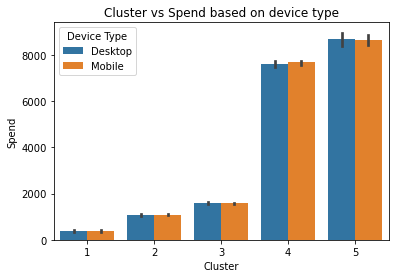

In [149]:
sns.barplot(x=clus_df['Cluster'],y=clus_df['Spend'],hue=clus_df['Device Type'])
plt.title('Cluster vs Spend based on device type')

Text(0.5, 1.0, 'Cluster vs Clicks')

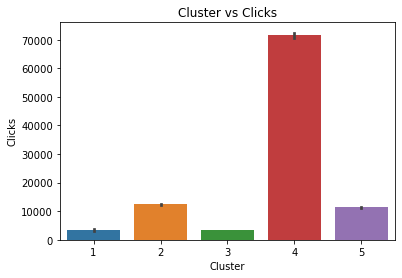

In [156]:
sns.barplot(x=clus_df['Cluster'],y=clus_df['Clicks'])
plt.title('Cluster vs Clicks')

Text(0.5, 1.0, 'Cluster vs Revenue ')

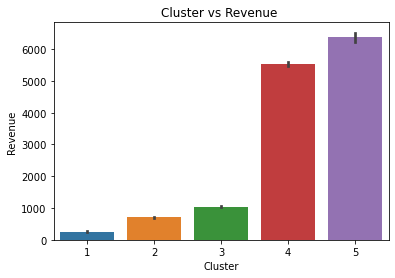

In [157]:
sns.barplot(x=clus_df['Cluster'],y=clus_df['Revenue'])
plt.title('Cluster vs Revenue ')

Text(0.5, 1.0, 'Cluster vs CPM')

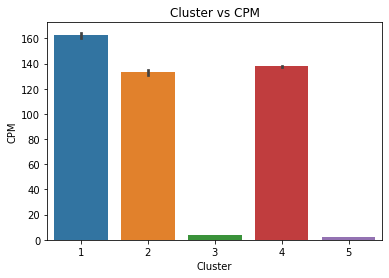

In [158]:
sns.barplot(x=clus_df['Cluster'],y=clus_df['CPM'])
plt.title('Cluster vs CPM')

Text(0.5, 1.0, 'Cluster vs CPC ')

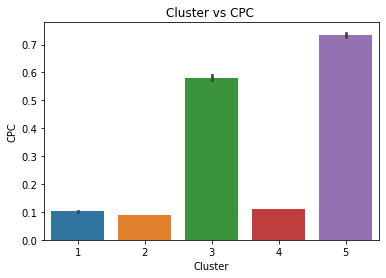

In [159]:
sns.barplot(x=clus_df['Cluster'],y=clus_df['CPC'])
plt.title('Cluster vs CPC ')

Text(0.5, 1.0, 'Cluster vs CTR')

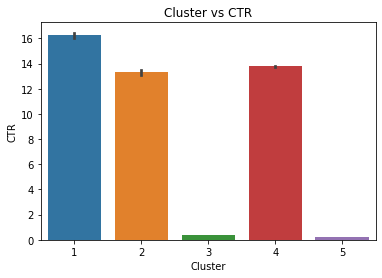

In [160]:
sns.barplot(x=clus_df['Cluster'],y=clus_df['CTR'])
plt.title('Cluster vs CTR')

Text(0.5, 1.0, 'Cluster vs Imperessions')

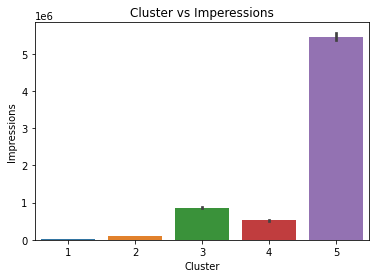

In [154]:
sns.barplot(x=clus_df['Cluster'],y=clus_df['Impressions'])
plt.title('Cluster vs Imperessions')

In [104]:
clus_df.groupby('Cluster')['Device Type'].value_counts()

Cluster  Device Type
1        Mobile         3908
         Desktop        2183
2        Mobile         3588
         Desktop        2010
3        Mobile         3935
         Desktop        2168
4        Mobile          797
         Desktop         456
5        Mobile         2578
         Desktop        1443
Name: Device Type, dtype: int64

Text(0.5, 1.0, 'Cluster vs Device Type')

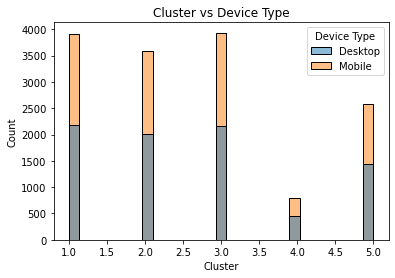

In [167]:
sns.histplot(x=clus_df['Cluster'],hue=clus_df['Device Type'])
plt.title('Cluster vs Device Type')

### Conclude the project by providing summary of your learnings

Cluster 1 - 
1. Ad lenght is lowest and Ad size is also low
2. Money spent on Ads is lowest
3. Revenue is lowest
4. Clicks is also low, that is people are not clicking more.
5. The impression rate is very low.
5. CPM is cost per 1000 impressions. The money spent/ imperssions is calculated. Here CPM is highest. This could be negitive
6. CPC is cost per click. That is you pay for each click, which is also low.
7. CTR is Click through rate is highest

Cluster 2:

1. Ad lenght is highest and Ad size is also highest
2. Money spent on Ads is low
3. Revenue is low
4. Clicks is moderate(second highest), that is people are showing interest in this ads and clicking more.
5. The impression rate is very low.
5. CPM is cost per 1000 impressions. The money spent/ imperssions is calculated. Here CPM is moderate.
6. CPC is cost per click. That is you pay for each click, which is very low.
7. CTR is Click through rate is moderate

Cluster 3:

1. Ad lenght is moderate and Ad size is also moderate
2. Money spent on Ads is moderate
3. Revenue is moderate
4. Clicks is lowest, that is people are not showing interest in this ads.
5. The impression rate is moderate.
5. CPM is cost per 1000 impressions. The money spent/ imperssions is calculated. Here CPM is very low.
6. CPC is cost per click. That is you pay for each click, which is moderate.
7. CTR is Click through rate is very low.

Cluster 4:

1. Ad lenght is lowest and Ad size is moderate.
2. Money spent on Ads is high
3. Revenue is high
4. Clicks is highest, that is people are clicking more that is the ads are interesting.
5. The impression rate is low.
5. CPM is cost per 1000 impressions. The money spent/ imperssions is calculated. Here CPM is high. 
6. CPC is cost per click. That is you pay for each click, which is also very low.
7. CTR is Click through rate is high.

Cluster 5:

1. Ad lenght is high and Ad size is high.
2. Money spent on Ads is highest
3. Revenue is highest
4. Clicks is moderate, that is people are clicking that is the ads are little interesting.
5. The impression rate is highest.
5. CPM is cost per 1000 impressions. The money spent/ imperssions is calculated. Here CPM is lowest. 
6. CPC is cost per click. That is you pay for each click, which is also highest.
7. CTR is Click through rate is the lowest


From the above conclusion about the each cluster, we could get an idea about the clusters.

According to spend and revenue, if we compare them:
This is the difference between spend and revenue(income)

* cluster 1 = 129.90737000000001
* cluster 2 = 376.70950099999993
* cluster 3 = 551.1767420000001
* cluster 4 = 2113.3316259999992
* cluster 5 = 2271.6493710000004




====================================================================================================================

====================================================================================================================

====================================================================================================================

### PCA:
Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

In [168]:
df = pd.read_excel('PCA India Data_Census.xlsx') 

In [169]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [170]:
df.shape

(640, 61)

In [171]:
df.iloc[:,:20].head(3)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,0,1999,2598,13381,11364,10007,18432,6723,3752,2763
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,6,427,517,10513,7891,9072,15211,6982,4200,4628
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,6,5806,9723,4534,5840,2012,5124,2775,4800,1940


In [203]:
df.iloc[:,20:40].head(5)

,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M
0,1275,486,235,407,143,78,86,1792,811,3960,2477,619,580,2052,641,142,244,1147,1012,16665
1,1733,1098,357,442,108,538,343,2550,925,2354,2467,384,661,915,547,369,627,686,632,12603
2,2923,519,1205,36,71,19,55,1366,1592,835,1877,360,1250,44,157,15,32,416,438,3771
3,408,35,102,8,24,9,6,439,276,511,710,135,286,63,176,10,43,303,205,1782
4,2267,743,766,254,237,35,64,1491,1200,3194,5425,1327,2462,1037,1069,62,319,768,1575,14874


In [204]:
df.iloc[:,40:61].head(5)

,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,26044,2810,1728,439,343,1372,389,110,198,889,...,1150,749,180,237,680,252,32,46,258,214
1,18902,1829,1752,261,432,729,399,293,449,546,...,525,715,123,229,186,148,76,178,140,160
2,6164,721,1689,316,1161,41,123,15,28,349,...,114,188,44,89,3,34,0,4,67,61
3,3088,317,463,74,158,50,126,6,33,187,...,194,247,61,128,13,50,4,10,116,59
4,22289,2320,3497,862,1419,832,767,38,214,588,...,874,1928,465,1043,205,302,24,105,180,478


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [175]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [176]:
df.duplicated().sum()

0

In [177]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [178]:
data = df.drop(['State Code','Dist.Code','State','Area Name'],axis=1)

In [179]:
data.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478


In [180]:
data.shape

(640, 57)

In [181]:
num_col_list=data.columns
num_col_list.shape

(57,)

###  PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

In [206]:
df.groupby(by='State')['TOT_M','TOT_F'].sum().sort_values(by='TOT_M')

<ipython-input-206-97d0d0b5d9db>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by='State')['TOT_M','TOT_F'].sum().sort_values(by='TOT_M')


,TOT_M,TOT_F
State,,
Dadara & Nagar Havelli,6982,10831
Lakshadweep,12823,14772
Daman & Diu,13153,18706
Andaman & Nicobar Island,18726,28691
Sikkim,26664,41518
Chandigarh,41753,59644
Arunachal Pradesh,50582,88066
Mizoram,59534,95463
Puducherry,70386,119074


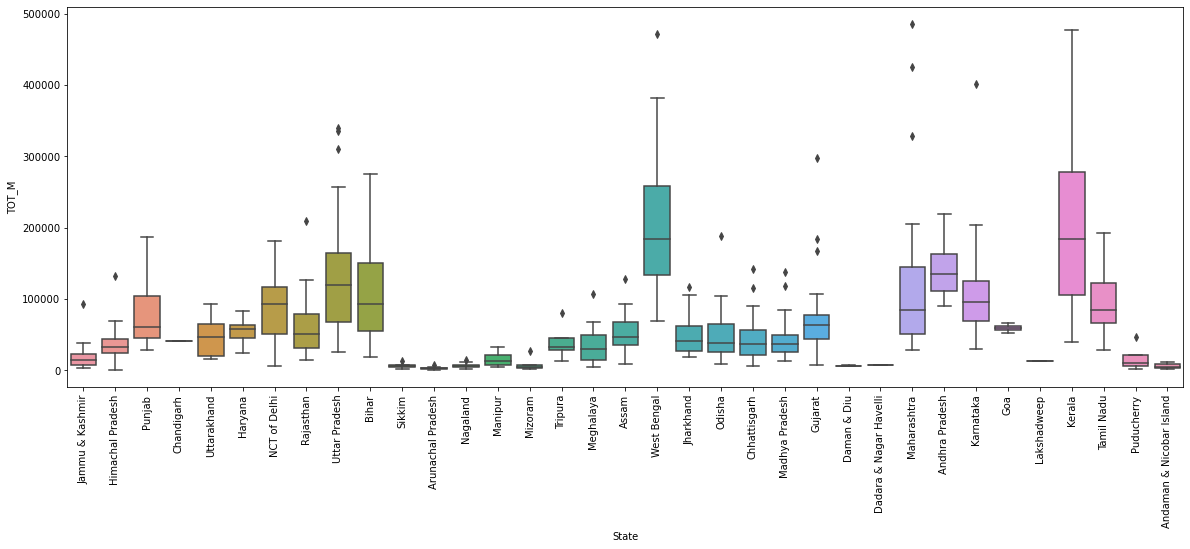

In [199]:
plt.figure(figsize=(20,7))
sns.boxplot(x='State',y='TOT_M',data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby(by='State')['TOT_M','TOT_F'].sum().min()

**Dadara & Nagar Havelli state has minimum population of male and female.**

In [ ]:
df.groupby(by='State')['TOT_M','TOT_F'].sum().max()

**Uttar Pradesh state has maximum population of male and female.**

In [208]:
df.groupby(by='Area Name')['TOT_M','TOT_F'].sum().sort_values(by='TOT_M')

<ipython-input-208-c09a9433534a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by='Area Name')['TOT_M','TOT_F'].sum().sort_values(by='TOT_M')


,TOT_M,TOT_F
Area Name,,
Dibang Valley,391,698
Anjaw,853,1688
Upper Siang,1187,2117
Lahul & Spiti,1207,2358
Nicobars,1549,2630
...,...,...
Bangalore,401545,664595
Thane,424759,706327
North Twenty Four Parganas,471482,725514


Dibang Valley has lowest Male and Female population

Mumbai Suburban has the highest Male and Female population

In [207]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [214]:
df.groupby(by='State')['M_ST','F_ST'].sum().sort_values(by='M_ST')

<ipython-input-214-080468dff4a9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by='State')['M_ST','F_ST'].sum().sort_values(by='M_ST')


,M_ST,F_ST
State,,
Punjab,0,0
Puducherry,0,0
NCT of Delhi,0,0
Chandigarh,0,0
Haryana,0,0
Andaman & Nicobar Island,1201,2064
Daman & Diu,1345,1939
Dadara & Nagar Havelli,5197,8094
Sikkim,10244,16220


In [213]:
df.groupby(by='State')['M_SC','F_SC'].sum().sort_values(by='M_SC')

<ipython-input-213-67054cb65c63>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by='State')['M_SC','F_SC'].sum().sort_values(by='M_SC')


,M_SC,F_SC
State,,
Andaman & Nicobar Island,0,0
Nagaland,0,0
Lakshadweep,0,0
Arunachal Pradesh,0,0
Mizoram,15,20
Dadara & Nagar Havelli,158,247
Daman & Diu,523,708
Meghalaya,1170,1458
Sikkim,1346,2024


In [ ]:
df.groupby(by='State')['M_SC','F_SC','M_ST','F_ST'].sum().min()

Andaman & Nicobar Island, Arunachal Pradesh, Lakshadweep, Nagaland has minimum Scheduled Castes population

Chandigarh, NCT of Delhi, Puducherry and Punjab	has minimum Scheduled Tribes population

In [ ]:
df.groupby(by='State')['M_SC','F_SC','M_ST','F_ST'].sum().max()

Uttar Pradesh has maximum Scheduled Castes population

Madhya Pradesh has maximum Scheduled Tribes population

In [215]:
df.groupby(by='State')['M_LIT','F_LIT'].sum().sort_values(by=['M_LIT'])

<ipython-input-215-d22dff36af2a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by='State')['M_LIT','F_LIT'].sum().sort_values(by=['M_LIT'])


,M_LIT,F_LIT
State,,
Dadara & Nagar Havelli,5119,5308
Lakshadweep,10601,11334
Daman & Diu,10880,12520
Andaman & Nicobar Island,15488,20237
Sikkim,21230,27112
Chandigarh,33552,43438
Arunachal Pradesh,33965,45307
Mizoram,48512,79412
Nagaland,55831,84327


In [ ]:
df.groupby(by='State')['M_LIT','F_LIT'].sum().min()

In [ ]:
df.groupby(by='State')['M_LIT','F_LIT'].sum().max()

In [ ]:
df.groupby(by='State')['MAIN_AL_M','MAIN_AL_F'].sum().sort_values(by=['MAIN_AL_M'])

In [ ]:
df.groupby(by='State')['MAIN_AL_M','MAIN_AL_F'].sum().sort_values(by=['MAIN_AL_F'])

### PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

As the data is about census, this data is important so it is not necessary to treat outliers.

In [216]:
num_col_list = data.columns
num_col_list

Index(['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST',
       'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
       'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F',
       'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
       'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F',
       'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F',
       'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F',
       'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F',
       'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

In [219]:
# plt.figure(figsize = (12,30))
# for i in num_col_list:
#     plt.subplot(15, 4, i + 1)
#     sns.boxplot(y = data[num_col_list[i]], data = data)
#     plt.title('Boxplot of {}'.format(num_col_list[i]))
#     plt.tight_layout()
#     plt.show()

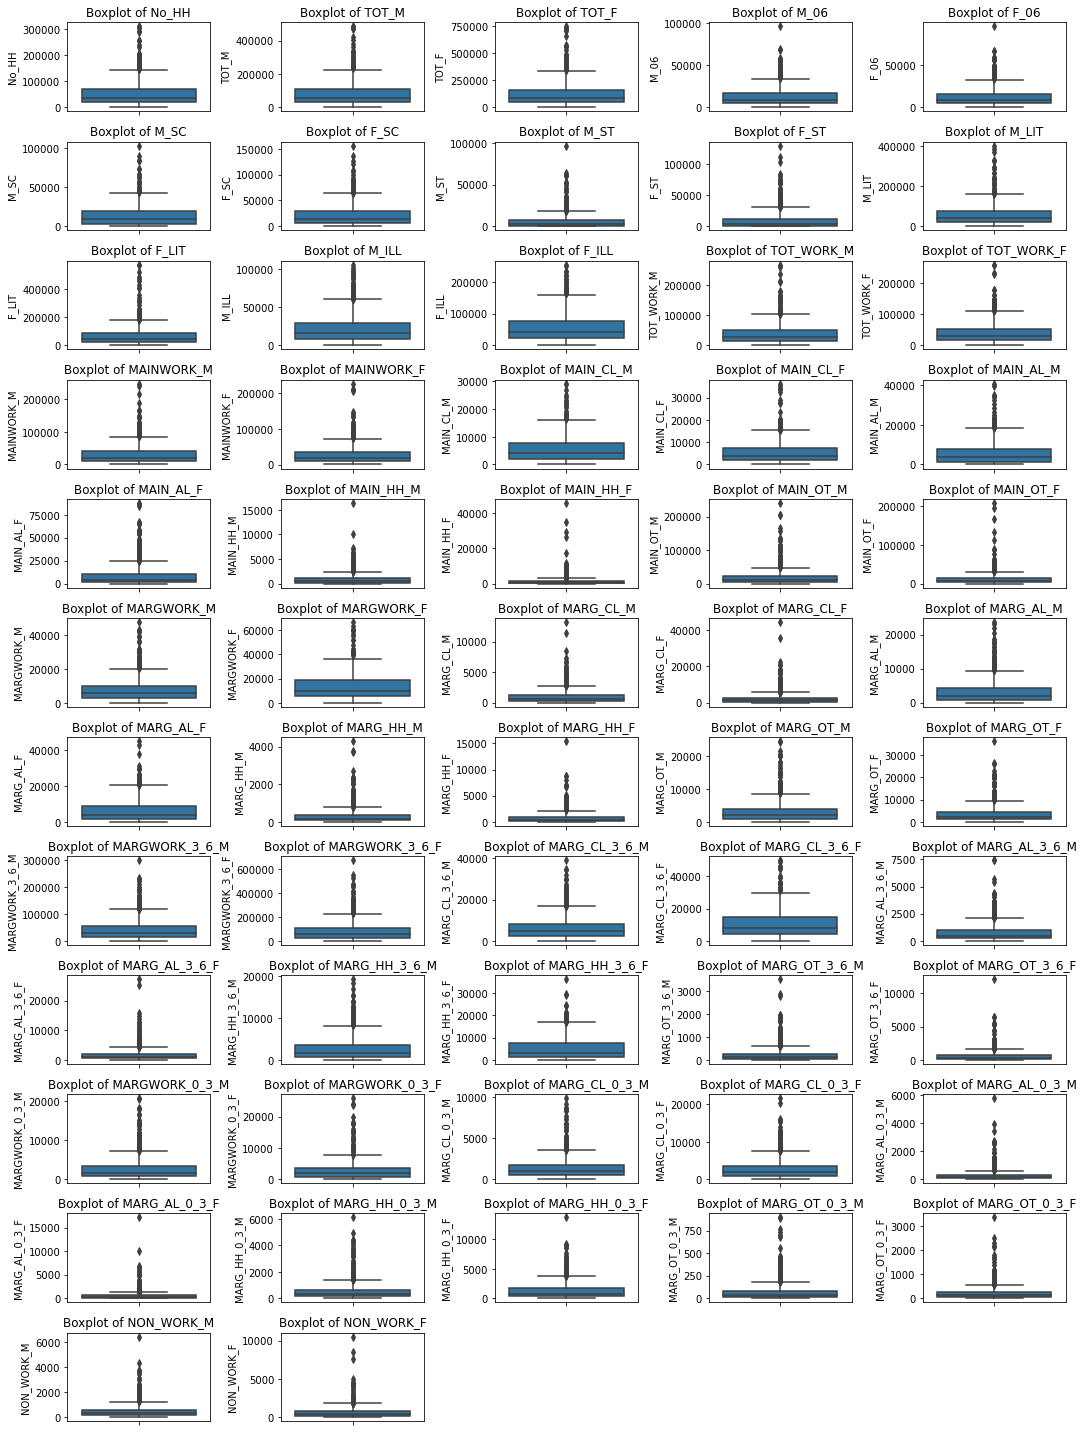

In [223]:
plt.figure(figsize=(15,20))
column_list = num_col_list
lent=column_list.shape[0]
for i in range(lent):
    plt.subplot(12,5,i+1)
    sns.boxplot(y=df[column_list[i]],data=df)
    plt.title('Boxplot of {}'.format(column_list[i]))
    plt.tight_layout()

### PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [225]:
from scipy.stats import zscore
scaled_df = data.apply(zscore)

In [226]:
scaled_df.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


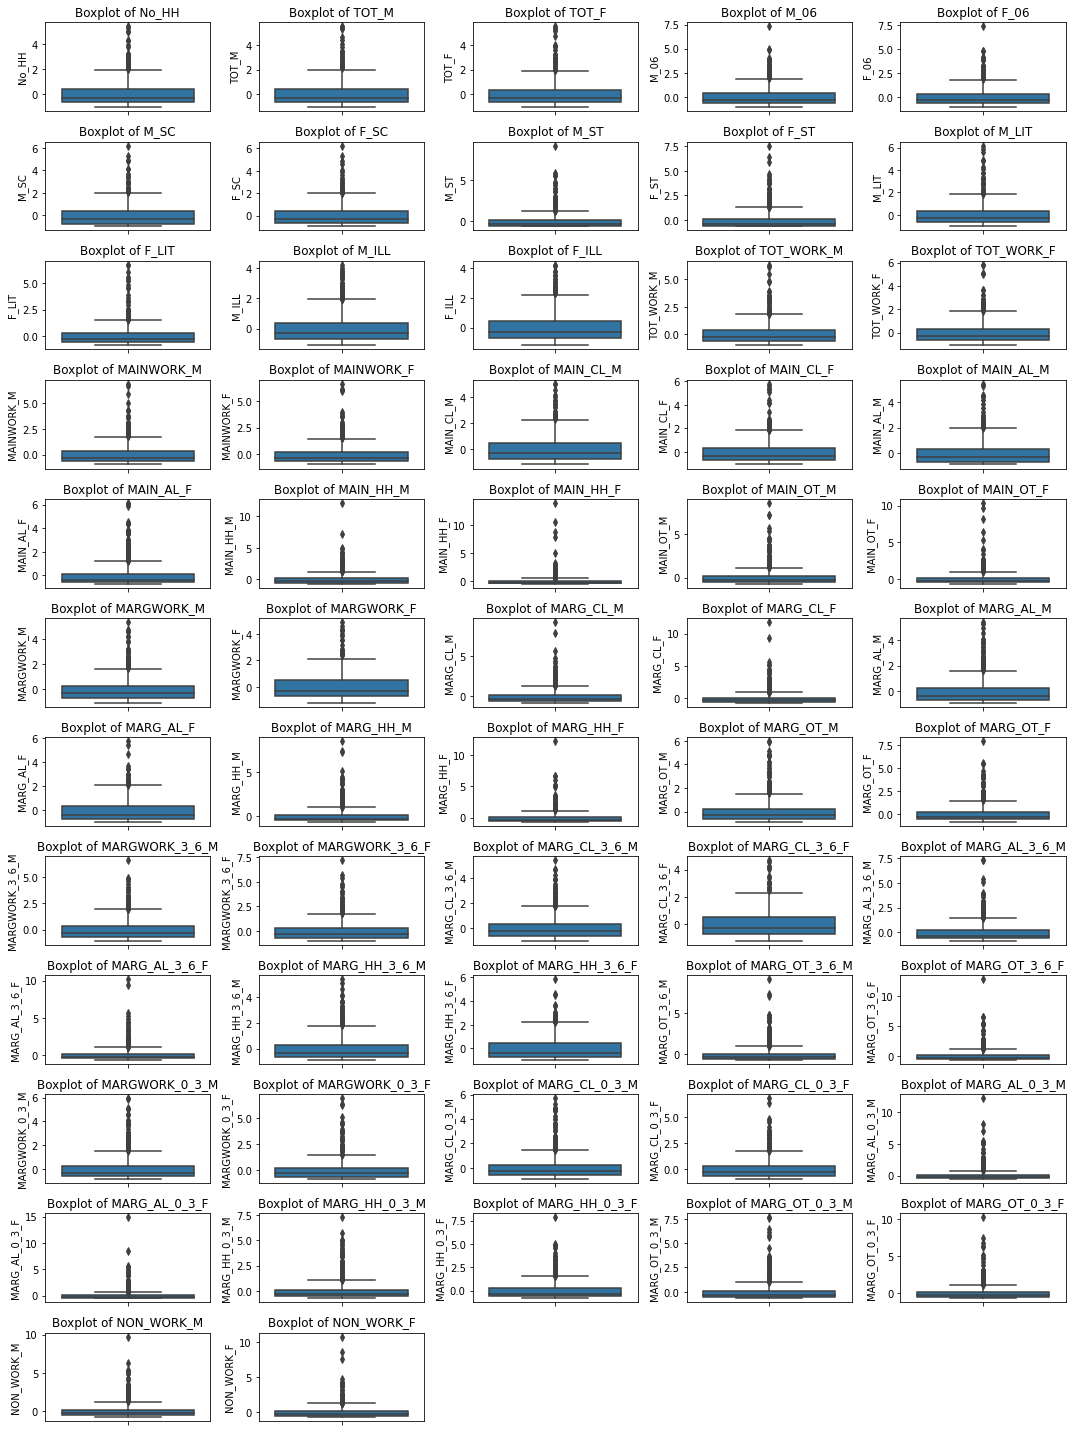

In [227]:
plt.figure(figsize=(15,20))
column_list = num_col_list
lent=column_list.shape[0]
for i in range(lent):
    plt.subplot(12,5,i+1)
    sns.boxplot(y=scaled_df[column_list[i]],data=scaled_df)
    plt.title('Boxplot of {}'.format(column_list[i]))
    plt.tight_layout()

There is no change in the outliers because of scaling

The outliers are same before and after scaling

### PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

Let us first check for the correlation amoung the variables
### Correlation amoung the variables

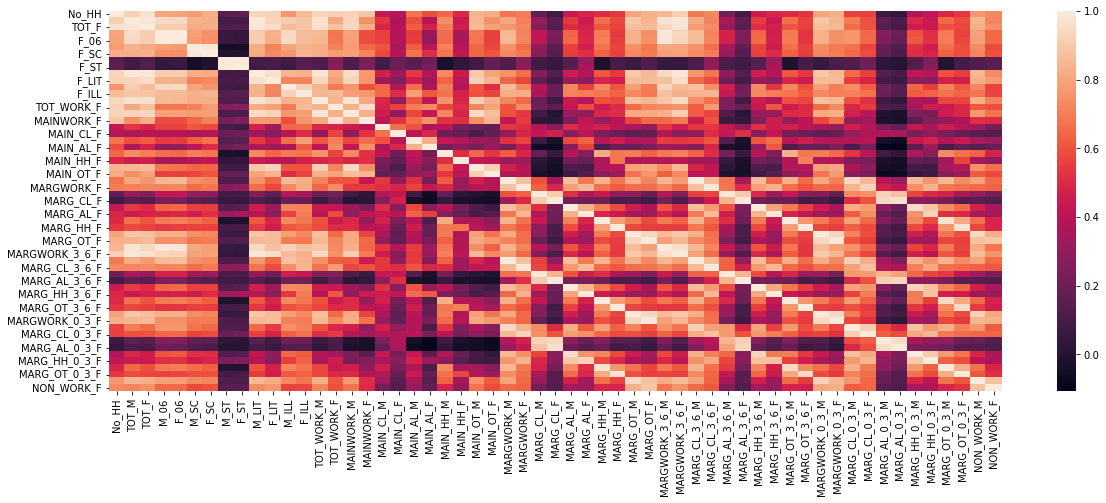

In [229]:
#Check for presence of correlations
plt.figure(figsize = (20,7))
sns.heatmap(scaled_df.corr());

### BARTLTETT'S TEST FOR SPHERICITY

**check for correlation** 

This helps to find if there is any redundancy present in between the variables.

To calculate this, we should import calculate_bartlett_sphericity module from factor_analyzer.

For this we get, chi square value and p value.

The p-value must be less than significant value $\alpha$

Here $\alpha$ = 0.05

H0: There are no significant correlations 

Ha: There are significant correlations

We Reject H0 if p-value < 0.05

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df)
p_value

The P-value is less than 0.05 therefore we reject null hypothesis.

By this we can understand that there is significant correlation between variables.


### KAISER-MEYER-OLKIN TEST

**check the adequancy of the sample size** by **KMO**

This helps in finding the Measure of Sample Adequancy (MSA)

The KMO value must be greater than 0.7.


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all , kmo_model = calculate_kmo(scaled_df)
kmo_model

The kmo_model represent the KMO value for complete variables, kmo_all gives the values for individual variables.

The value of kmo_model is 0.8 which indicates that the component analysis will be useful for these variables.

### Apply PCA

In [230]:
from sklearn.decomposition import PCA

pca = PCA(n_components=57,random_state=1)

pca_trans = pca.fit_transform(scaled_df)

#### Eigen vectors

In [231]:
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [-0.        ,  0.03516982,  0.00268411, ...,  0.01125835,
         0.03265042, -0.19485574],
       [-0.        , -0.00071107,  0.02957096, ...,  0.04994692,
         0.08691108, -0.03887756],
       [-0.        , -0.06832175, -0.05655578, ..., -0.04339803,
         0.02904604, -0.1150535 ]])

#### Eigen values

In [232]:
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

#### Eigen value for each component

In [233]:
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [234]:
df_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                                'PC13','PC14', 'PC15', 'PC16', 'PC17', 'PC18',
                                               'PC19','PC20', 'PC21', 'PC22', 'PC23', 'PC24',
                                                'PC25','PC26', 'PC27','PC28','PC29'
                                                'PC30','PC31','PC32','PC33','PC34','PC35',
                                                'PC36','PC37','PC38','PC39','PC40','PC41','PC42',
                                                'PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
                                                'PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58'],
                                    index = scaled_df.columns)



In [235]:
df_loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238,0.004265,0.019985,...,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024501,...,1.930457e-01,-1.944000e-01,5.877790e-02,3.930583e-02,-1.861934e-01,2.167434e-01,1.623360e-01,3.516982e-02,-7.110687e-04,-6.832175e-02
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038041,...,1.474601e-01,-4.638747e-02,1.011317e-01,1.278956e-01,1.159676e-01,-1.428027e-02,-1.110613e-01,2.684113e-03,2.957096e-02,-5.655578e-02
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056773,-0.153574,...,3.215908e-15,-6.665682e-16,-9.862754e-16,1.600096e-15,3.740228e-15,-1.791077e-15,-2.502501e-15,1.524644e-15,1.830136e-15,-2.424028e-15
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459,-0.059323,-0.169567,...,-4.011293e-15,1.194290e-15,7.705410e-16,-6.987340e-16,-3.477623e-15,2.092316e-15,2.451397e-15,-1.773091e-15,-9.974859e-16,2.976888e-15


###  Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

#### Scree plot 

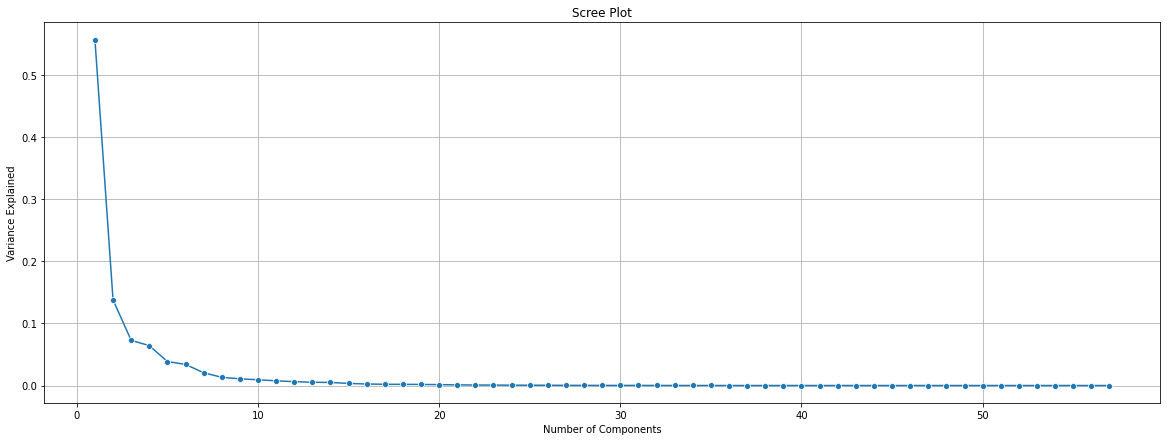

In [239]:
plt.figure(figsize=(20,7))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

#### cummulative of explained variance ration

In [237]:
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

#### Choose PC's based on the above cummulative sum output.

we can consider 8 components. There is large variance upto 8 components.

In [240]:
df_selected = df_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6','PC7', 'PC8']]

In [241]:
df_selected.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459


### Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

#### Let's check the features that matter for each pc

In [243]:
# plt.figure(figsize = (20,15))
# for i in range(len(df_selected.columns)):
#     plt.subplot(4,2,i+1)
#     abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
#     plt.yticks(np.arange(0,1.2,.2))
#     plt.title('Abs. loadings of {}'.format(df_selected.columns[i]),fontsize=12)
#     plt.tight_layout()

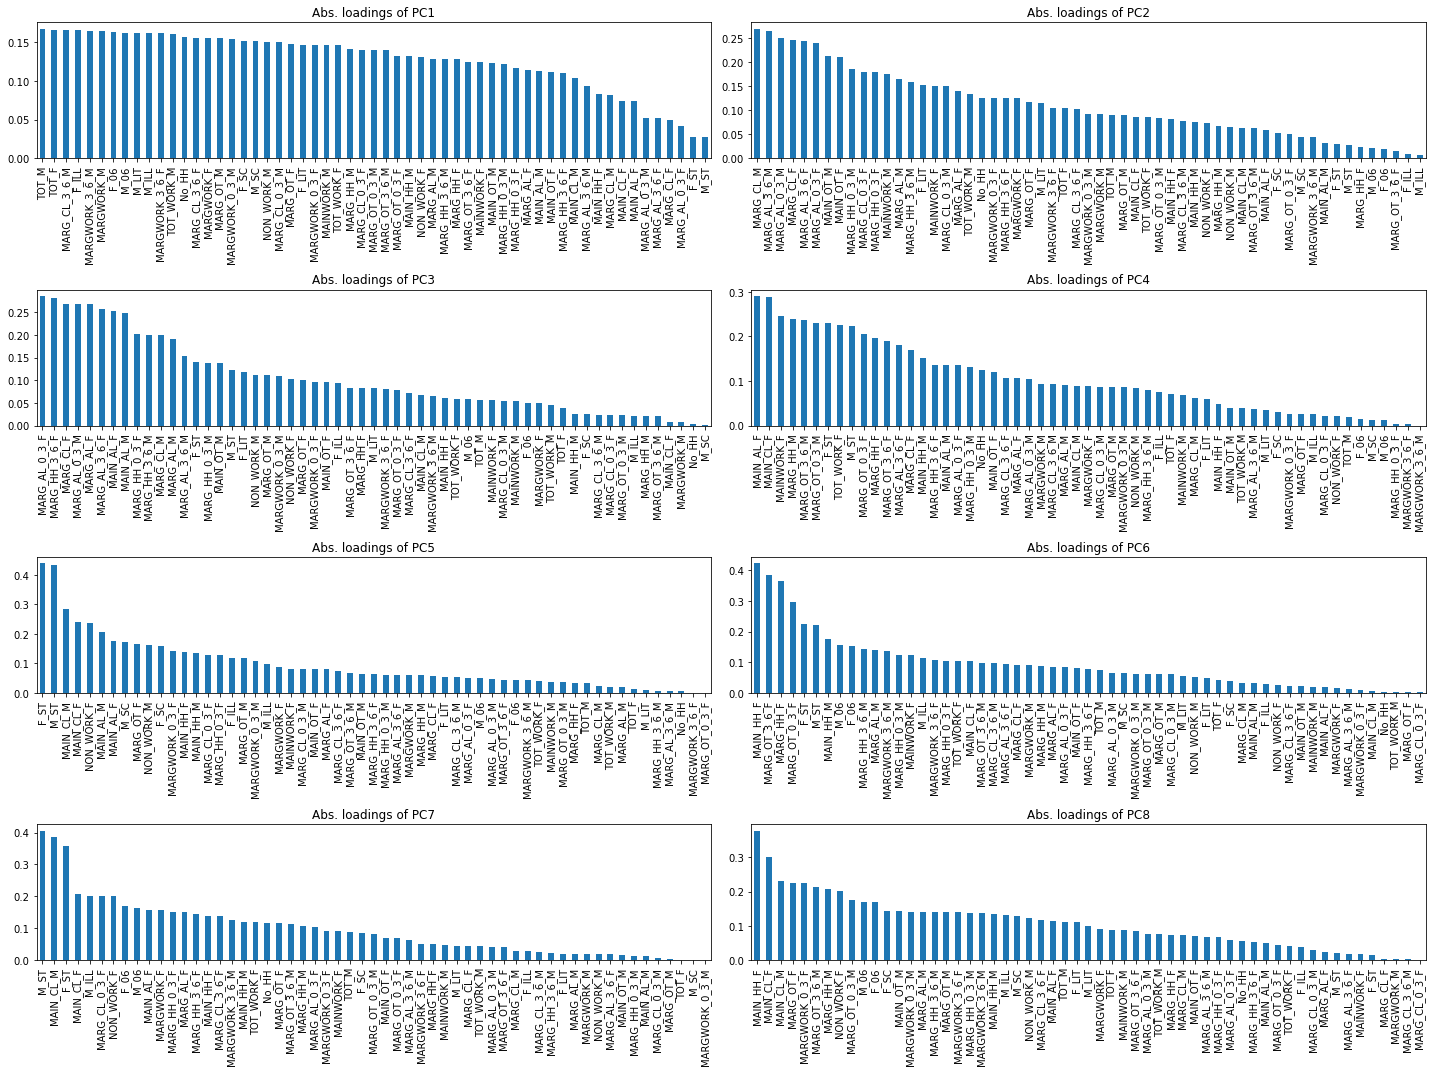

In [250]:
plt.figure(figsize = (20,15))
length = df_selected.columns.shape[0]
for i in range(length):
    plt.subplot(4,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
#     plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]),fontsize=12)
    plt.tight_layout()

In [248]:
df_selected.columns.shape[0]

8

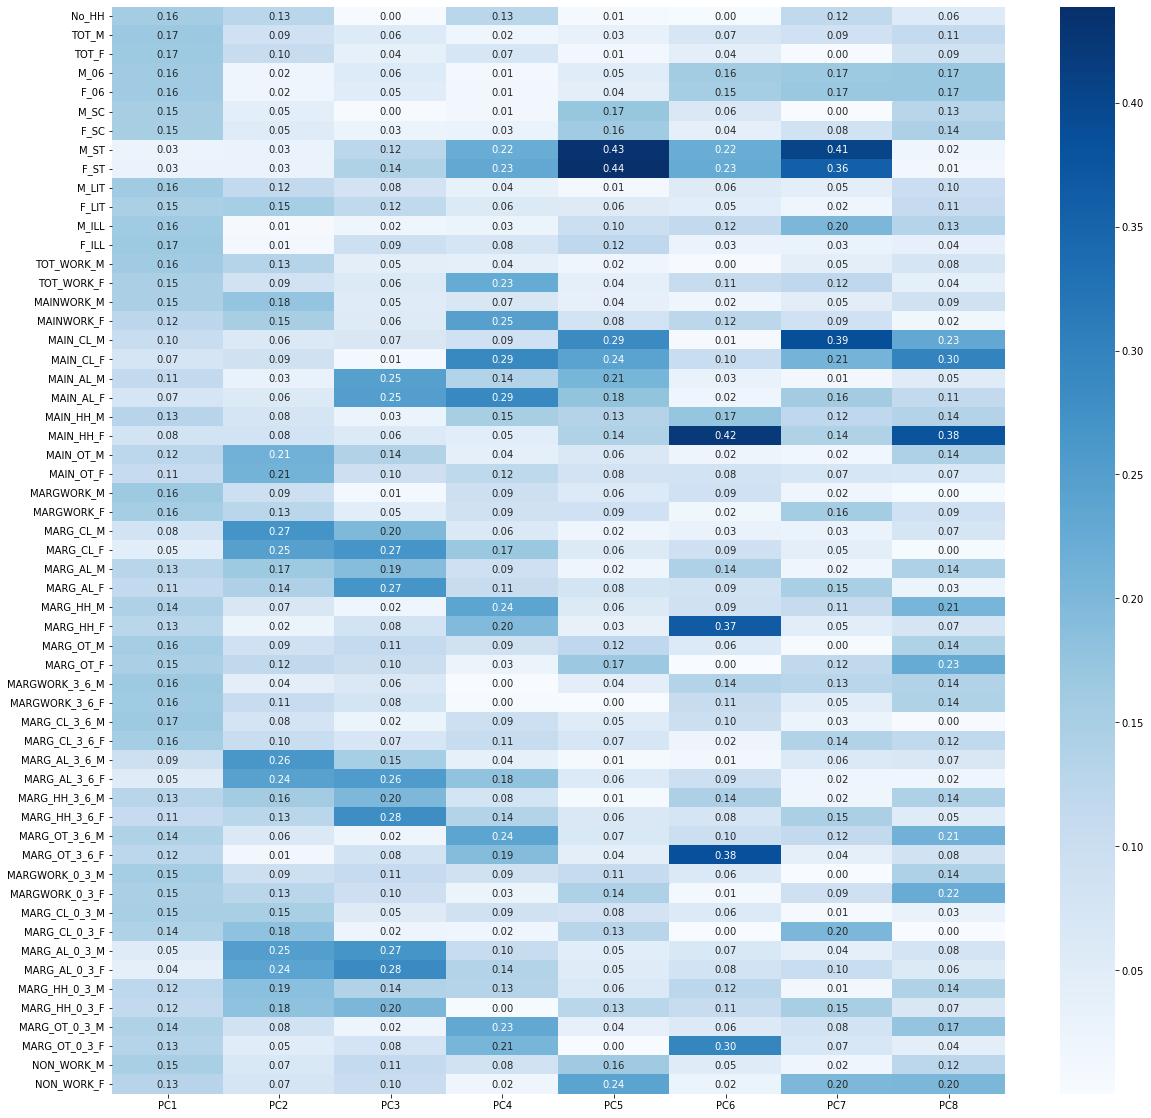

In [289]:
plt.figure(figsize = (20,20))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

#### Structure of Principal Components and PC Scores

To get the PC scores, we must do dot product of components and scaled data.

The Principal Components are the linear combination of all the scaled data variables.

In [254]:
df_selected.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459


In [252]:
scaled_df.T.iloc[19:31].T

,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F
0,-0.851060,-0.683276,-0.630766,-0.407555,-0.624042,-0.611637,-0.516943,-0.966512,-0.321809,-0.485053,-0.331426,-0.860192
1,-0.845587,-0.685999,-0.270728,-0.326659,-0.594942,-0.605624,-0.733823,-0.967422,-0.501127,-0.462312,-0.632331,-0.874080
2,-0.909079,-0.688878,-0.676945,-0.417313,-0.640396,-0.570440,-0.938955,-1.021117,-0.519440,-0.296948,-0.862840,-0.931699
3,-0.913457,-0.692534,-0.684772,-0.432737,-0.675984,-0.639858,-0.982709,-1.127325,-0.691127,-0.567595,-0.857811,-0.928892
4,-0.874987,-0.675964,-0.664422,-0.414480,-0.635597,-0.591118,-0.620386,-0.698216,0.218434,0.043325,-0.600044,-0.796959
...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.910486,-0.694012,-0.679293,-0.433681,-0.562003,-0.602406,-1.004586,-1.161818,-0.793377,-0.646206,-0.873690,-0.954156
636,-0.813841,-0.624152,-0.672249,-0.380170,-0.507910,-0.500388,-0.938415,-1.084369,-0.774300,-0.639468,-0.802500,-0.878808
637,-0.914552,-0.694323,-0.679293,-0.422664,-0.681320,-0.628728,-0.999049,-1.146710,-0.779642,-0.645364,-0.871573,-0.952826
638,-0.904856,-0.692223,-0.685554,-0.432422,-0.636250,-0.580251,-0.969475,-1.145709,-0.711730,-0.602128,-0.856224,-0.946769


In [251]:
pca = PCA(n_components=8, random_state=123)
pca_final = pca.fit_transform(scaled_df)
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-4.617263,0.138116,0.328545,1.543697,0.353736,-0.420947,-0.010392,0.479105
1,-4.771662,-0.105865,0.244449,1.963215,-0.153884,0.417310,-0.023120,-0.006789
2,-5.964836,-0.294347,0.367393,0.619543,0.478199,0.276582,0.069559,0.040695
3,-6.280796,-0.500384,0.212701,1.074516,0.300799,0.051158,-0.250542,0.084365
4,-4.478566,0.894154,1.078277,0.535556,0.804065,0.341677,-0.092331,0.376965
5,-3.319963,2.823865,3.058460,-0.447906,0.742445,0.634672,-0.455679,0.397792
6,-5.021393,-0.346359,0.650378,0.981072,-0.059777,-0.246955,-0.135015,0.173983
7,-4.608709,0.022370,0.398755,1.576995,0.171317,-0.139443,-0.137580,0.276601
8,-5.186703,-0.059097,0.184397,1.735440,0.169174,0.455040,-0.268003,-0.090030
9,-4.226190,-1.335080,0.697838,1.470509,0.269147,-0.002573,-0.248792,0.178673


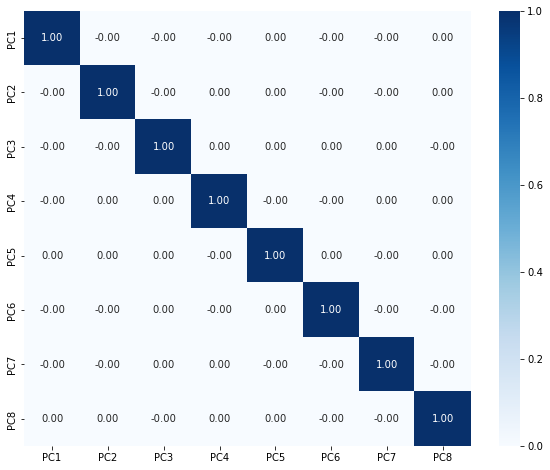

In [332]:
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f',cmap='Blues');

### Write linear equation for first PC.

In [291]:
df_selected.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459


In [344]:
print('The linear equation of First PC:')
print('\n')
for i in range(scaled_df.shape[1]):
    print(S_d[i],'X',comp[i])

The linear equation of First PC:


-0.9047375442726222 X 0.15602057858567936
-0.7712364536733182 X 0.1671176348853346
-0.8155625820369515 X 0.16555317909064893
-0.5610115106758324 X 0.16219294820465552
-0.5077383897071448 X 0.16256639565734834
-0.9585745972915195 X 0.15135784909060584
-0.9570485925256337 X 0.15156650019208875
-0.42330550019368 X 0.02723419457100421
-0.47642316565413956 X 0.028183315015872686
-0.7980974549077947 X 0.16199283733629158
-0.7334774895508266 X 0.14687268030140285
-0.604014646963687 X 0.16174944463471633
-0.7982290346008761 X 0.16524818736833372
-0.8592603821567523 X 0.1598719881620129
-1.01023773336172 X 0.14593580377247625
-0.8723669584689564 X 0.14620072976305987
-0.8982155430715099 X 0.1239702835727365
-1.0428436137704937 X 0.1031271588301987
-0.9866300225342314 X 0.07453978555483678
-0.8510601190840429 X 0.11335571218156724
-0.6832764753976269 X 0.0738821590315588
-0.6307659813495755 X 0.13157258402275604
-0.40755497183694095 X 0.08338263967435766
-0.624

In [340]:
np.dot(S_d,comp)

-4.6172634815543905

The above values is the first PC1 score.

In [341]:
pca_final_df.head(1)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-4.617263,0.138116,0.328545,1.543697,0.353736,-0.420947,-0.010392,0.479105


### END